Nota Media por curso

In [52]:
import pandas as pd
print(pd.__version__)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

2.2.3


In [53]:
df = pd.read_csv("dados_alunos.csv" , sep = ",")

In [54]:
df

,nome,idade,genero,curso,semestre,nota_final,faltas
0,Fernanda,22,F,Engenharia,7,8.85,21
1,Eduardo,28,M,ADS,1,6.49,9
2,Igor,24,M,Arquitetura,3,5.85,8
3,Igor,29,F,Arquitetura,10,5.65,7
4,Bruno,28,M,Arquitetura,7,8.64,5
...,...,...,...,...,...,...,...
95,Helena,26,M,ADS,2,6.65,21
96,Carlos,20,F,Engenharia,8,9.33,24
97,Diana,27,M,Direito,1,9.31,17
98,Igor,27,F,Medicina,9,8.88,17


In [55]:
print(df.columns)



Index(['nome', 'idade', 'genero', 'curso', 'semestre', 'nota_final', 'faltas'], dtype='object')


         curso  nota_final
0          ADS    7.312308
1  Arquitetura    7.309500
2      Direito    7.869375
3   Engenharia    7.722727
4     Medicina    7.660000


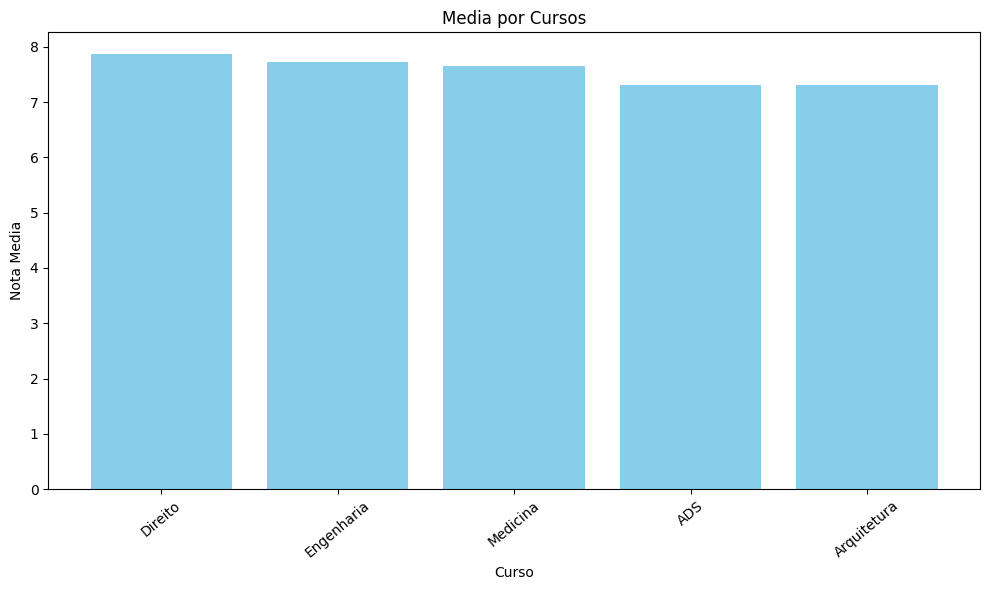

In [56]:
df = pd.read_csv('dados_alunos.csv')
media_por_curso = df.groupby('curso')['nota_final'].mean().reset_index()
print(media_por_curso)
media_por_curso = media_por_curso.sort_values(by='nota_final' , ascending = False)

# grafico de barras 
plt.figure(figsize=(10, 6))
plt.bar(media_por_curso['curso'], media_por_curso['nota_final'], color='skyblue')

# estilizacao
plt.title('Media por Cursos')
plt.xlabel('Curso')
plt.ylabel('Nota Media')
plt.xticks(rotation=40)
plt.tight_layout()

# grafico mostrar
plt.show()

In [57]:

quantidade_por_curso_genero = df.groupby(['curso', 'genero'])['nome'].count().unstack(fill_value=0)

print(quantidade_por_curso_genero)


genero        F   M
curso              
ADS          17   9
Arquitetura  12   8
Direito      11   5
Engenharia   11  11
Medicina     13   3


In [58]:
df = pd.read_csv('dados_alunos.csv')

# Calcular a média do semestre por curso
media_semestre_por_curso = df.groupby('curso')['semestre'].mean().round(2)

print(media_semestre_por_curso)

curso
ADS            5.88
Arquitetura    5.90
Direito        5.38
Engenharia     5.86
Medicina       6.38
Name: semestre, dtype: float64


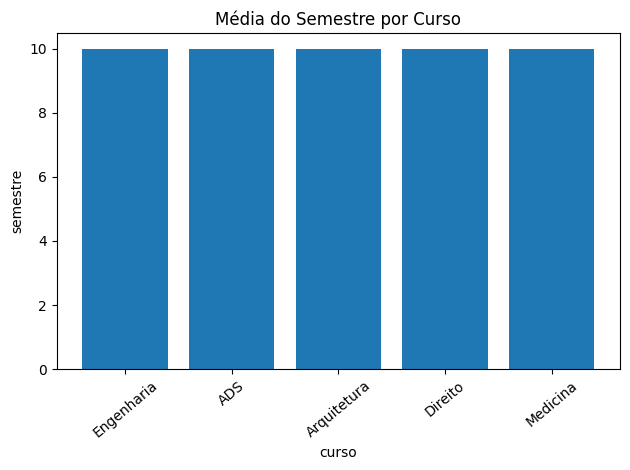

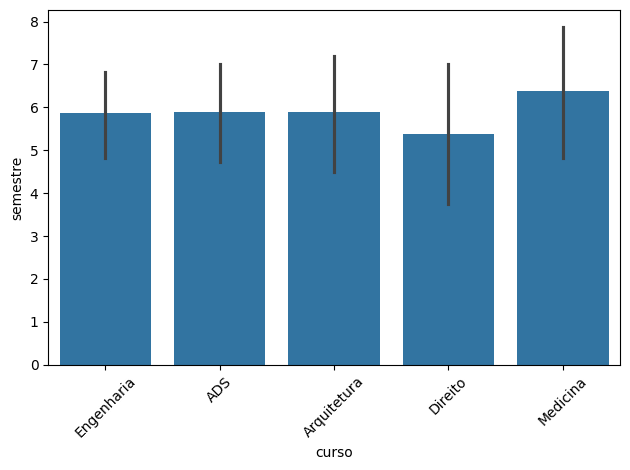

In [59]:
import seaborn as sns
df = pd.read_csv('dados_alunos.csv')
# Calcular a media do semestre por curso
media_semestre_por_curso = df.groupby('curso')['semestre'].mean().round(2)

plt.bar(df['curso'], df['semestre'])
plt.title('Média do Semestre por Curso')
plt.xlabel('curso')
plt.ylabel('semestre')

plt.xticks(rotation=40)
plt.tight_layout()
plt.show()

sns.barplot(x='curso', y='semestre', data=df)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [60]:
# Calcular a média de idade por semestre
media_idade_por_semestre = df.groupby('semestre')['idade'].mean().reset_index()
media_idade_por_semestre.columns = ['Semestre', 'Média de Idade']

# Exibir o resultados
print(media_idade_por_semestre)

   Semestre  Média de Idade
0         1       27.700000
1         2       26.666667
2         3       26.333333
3         4       25.125000
4         5       31.833333
5         6       26.777778
6         7       24.833333
7         8       24.923077
8         9       23.727273
9        10       26.384615


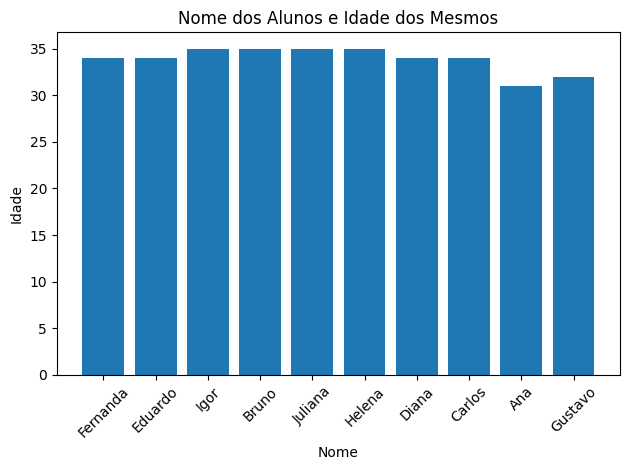

In [61]:
# Gráfico de Barras
plt.bar(df['nome'], df['idade'])

# Títulos e Rótulos
plt.title('Nome dos Alunos e Idade dos Mesmos')
plt.xlabel('Nome')
plt.ylabel('Idade')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


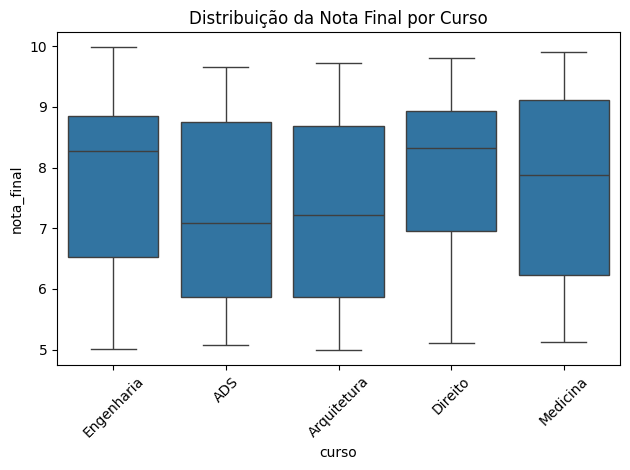

In [62]:
# Notas finais por cursos
sns.boxplot(x='curso', y='nota_final', data=df)
plt.title('Distribuição da Nota Final por Curso')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

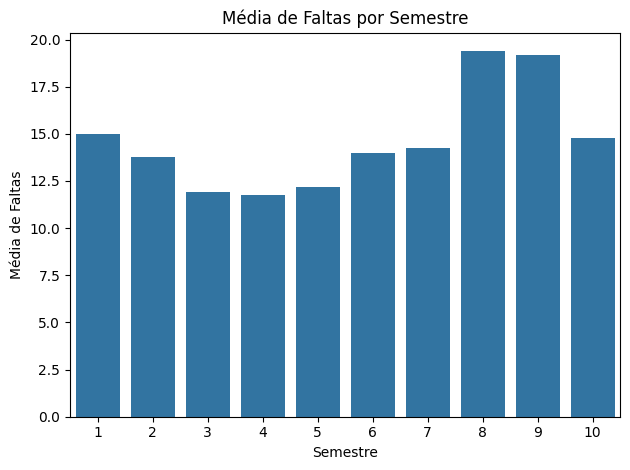

In [63]:
# Média de faltas por semestre
faltas_por_semestre = df.groupby('semestre')['faltas'].mean()

sns.barplot(x=faltas_por_semestre.index, y=faltas_por_semestre.values)
plt.title('Média de Faltas por Semestre')
plt.xlabel('Semestre')
plt.ylabel('Média de Faltas')
plt.tight_layout()
plt.show()


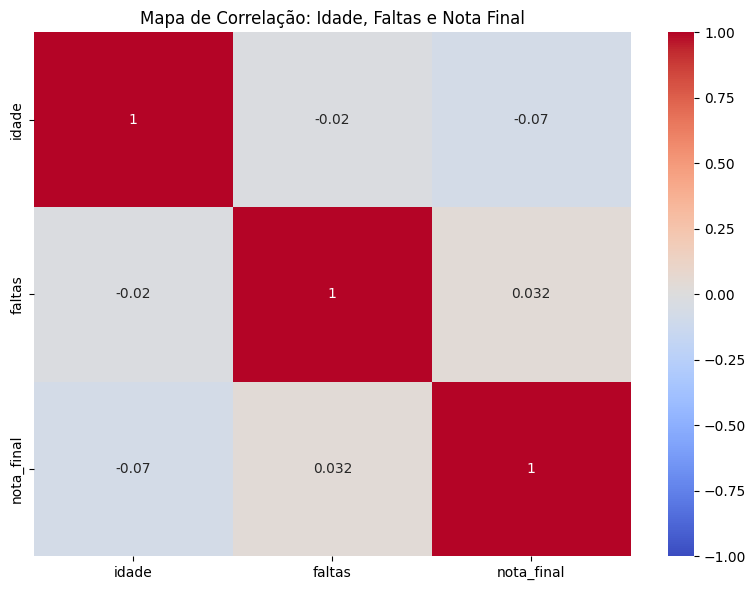

In [64]:
# Heatmap de correlação entre idade, faltas e nota final
plt.figure(figsize=(8, 6))
sns.heatmap(df[['idade', 'faltas', 'nota_final']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Correlação: Idade, Faltas e Nota Final')
plt.tight_layout()
plt.show()


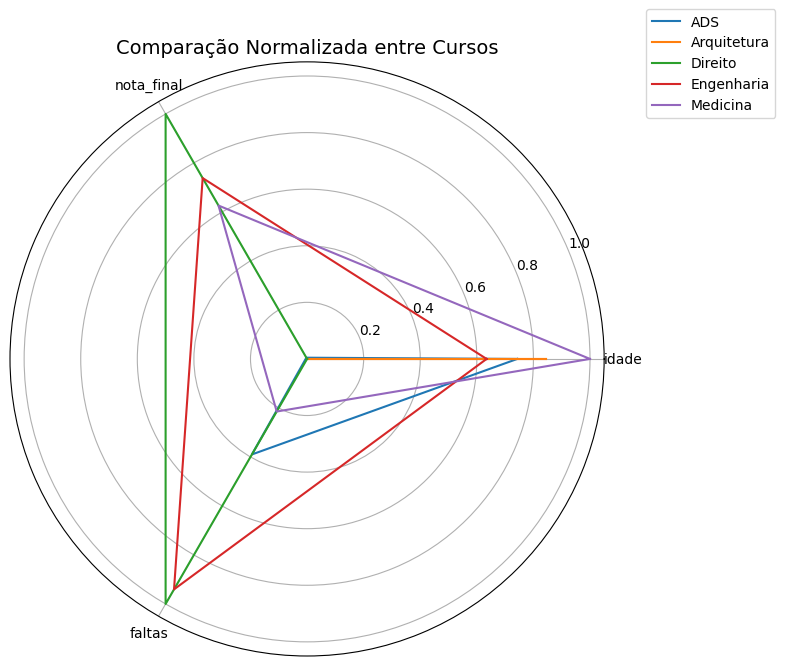

In [67]:
# Agrupamento por curso e cálculo das médias
radar_df = df.groupby("curso")[["idade", "nota_final", "faltas"]].mean()

# Normalização dos dados (0 a 1)
radar_norm = (radar_df - radar_df.min()) / (radar_df.max() - radar_df.min())

# Preparação do gráfico
labels = radar_norm.columns.tolist()
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

plt.figure(figsize=(8, 8))
for index, row in radar_norm.iterrows():
    values = row.tolist()
    values += values[:1]
    plt.polar(angles, values, label=index)

plt.xticks(angles[:-1], labels)
plt.title("Comparação Normalizada entre Cursos", size=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()

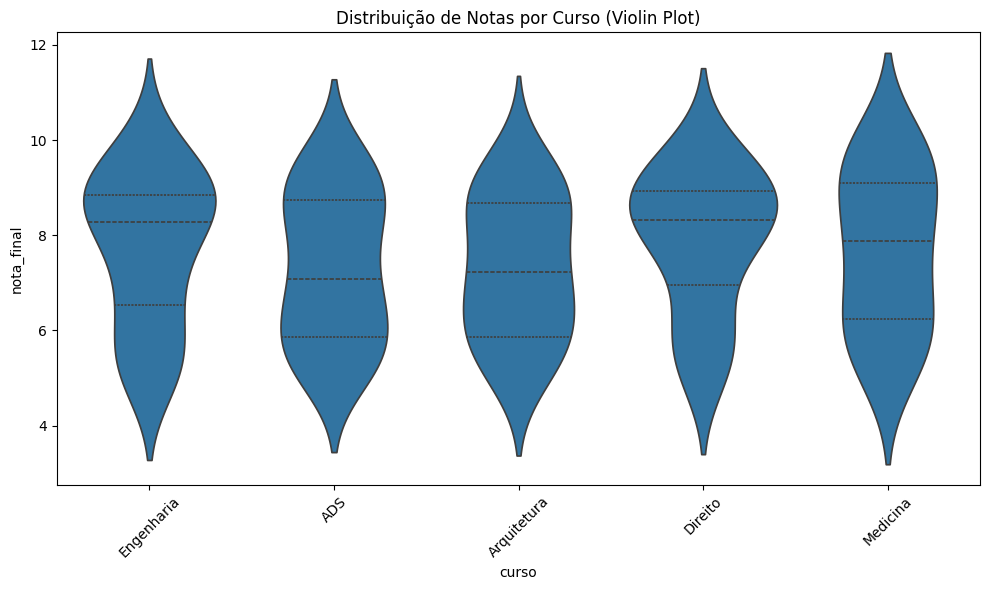

In [70]:
# Gráfico de violino para distribuição de notas por curso 
plt.figure(figsize=(10, 6))
sns.violinplot(x='curso', y='nota_final', data=df, inner='quartile')
plt.title('Distribuição de Notas por Curso (Violin Plot)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


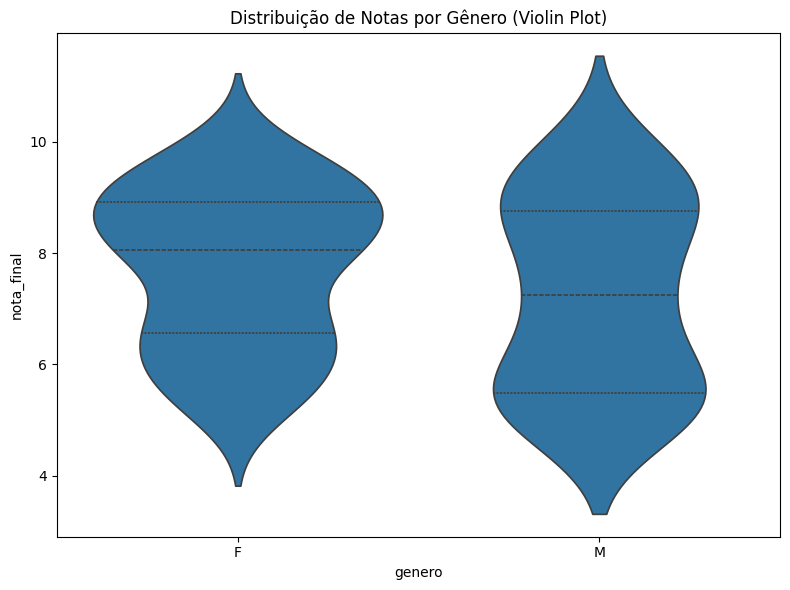

In [69]:
# Gráfico de violino para distribuição de notas por gênero
plt.figure(figsize=(8, 6))
sns.violinplot(x='genero', y='nota_final', data=df, inner='quartile')
plt.title('Distribuição de Notas por Gênero (Violin Plot)')
plt.tight_layout()
plt.show()

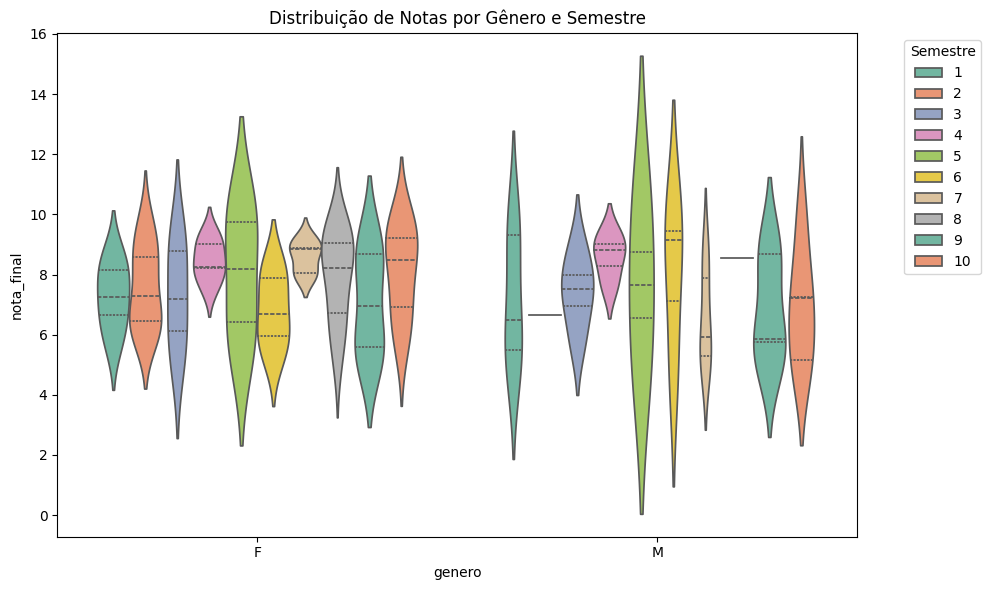

In [71]:
# Grafico de violino para distribuição de notas por gênero e semestre
plt.figure(figsize=(10, 6))
sns.violinplot(x='genero', y='nota_final', hue='semestre', data=df, inner='quartile', palette='Set2', dodge=True)
plt.title('Distribuição de Notas por Gênero e Semestre')
plt.legend(title='Semestre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

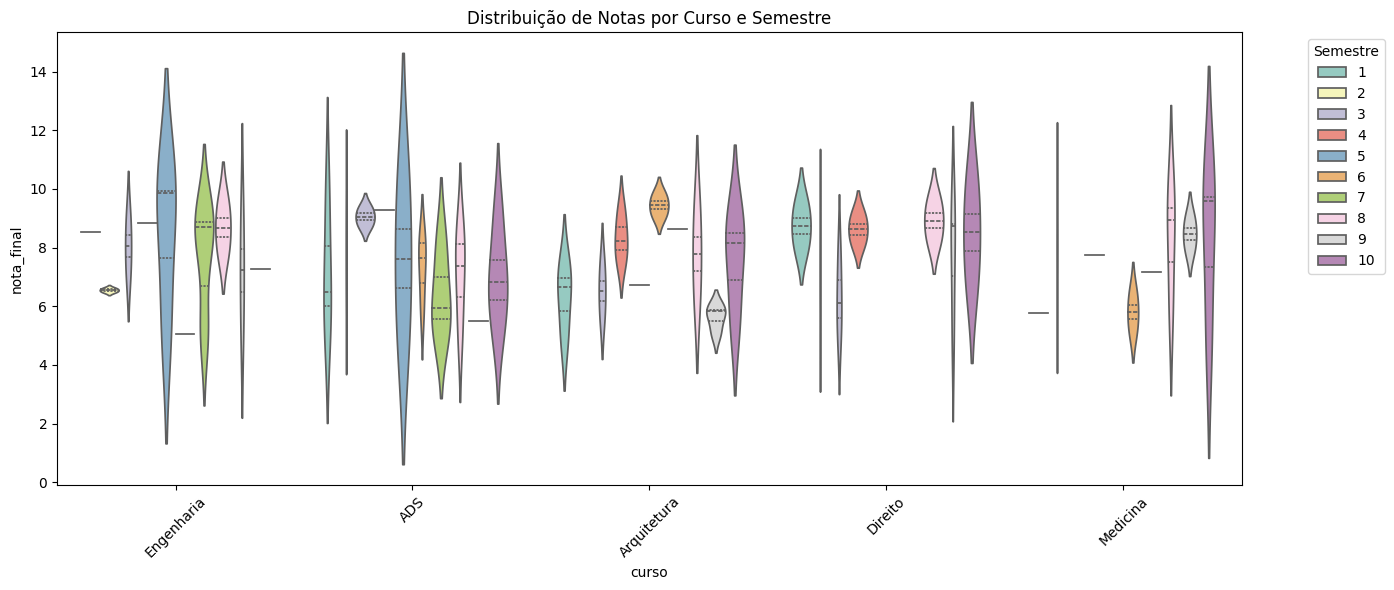

In [74]:
# Gráfico de violino para distribuição de notas por curso e semestre.
# Achei muito interessante este tipo de gráfico. 
plt.figure(figsize=(14, 6))
sns.violinplot(x='curso', y='nota_final', hue='semestre', data=df, inner='quartile', palette='Set3', dodge=True)
plt.title('Distribuição de Notas por Curso e Semestre')
plt.xticks(rotation=45)
plt.legend(title='Semestre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()